In [27]:
import numpy as np 
import scipy.linalg as la
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style


Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.<br> 
a) Diagonalize $A$.<br> 

b) Use el hecho de que $f(A) = U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.<br>.
c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.<br> 
d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

In [28]:
x1 = np.array([2, -1, 1])
x2 = np.array([0, 3, -1])
x3 = np.array([2, 1, +3])

A = np.asmatrix([x1,x2,x3])

In [29]:
type(A)

numpy.matrix

In [30]:
E, U = la.eig(A) # E valores porpios, U vectores propios 

In [31]:
E.round()

array([4.+0.j, 2.+0.j, 2.-0.j])

In [32]:
U.round()

array([[-1.+0.j, -1.+0.j, -1.-0.j],
       [ 1.+0.j,  1.+0.j,  1.-0.j],
       [-1.+0.j,  1.-0.j,  1.+0.j]])

In [33]:
U = np.asmatrix(U)

In [34]:
U.round()

matrix([[-1.+0.j, -1.+0.j, -1.-0.j],
        [ 1.+0.j,  1.+0.j,  1.-0.j],
        [-1.+0.j,  1.-0.j,  1.+0.j]])

In [35]:
D = U.I @ (A @U) #D matriz a diagonalizada 

In [36]:
D.round() # la diagonal principal coinciden con los valores propios 

matrix([[ 4.-0.j, -0.+0.j, -0.+0.j],
        [-0.-0.j,  2.+0.j,  0.-0.j],
        [-0.+0.j,  0.+0.j,  2.-0.j]])

In [37]:
np.diag(E, 0).round() # matriz igual a D, A diagonalizada 

array([[4.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 2.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 2.-0.j]])

In [38]:
f = lambda t: np.exp(E*t) 
r0=np.array([1,1,2])

In [90]:
time = np.linspace(0, 2, 100)

x_t = np.array([]) 
y_t = np.array([]) 
z_t = np.array([]) 

for i in time:
  Diagonal = np.diag(f(i), 0)
  f_A = U@Diagonal@U.I
  r = np.array(f_A @ r0.T) # este van a ser los valores de x(t), y(t), z(t)
  x_t = np.append(x_t, r[0][0].real) #Todos los valores de x para el intervalo de t 
  y_t = np.append(y_t, r[0][1].real) #Todos los valores de x para el intervalo de t 
  z_t = np.append(z_t, r[0][2].real) #Todos los valores de x para el intervalo de t 



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


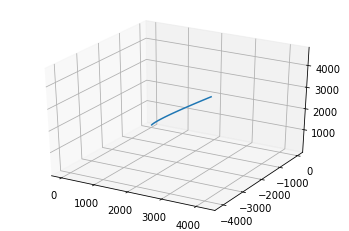

In [91]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

# Creamos la figura
fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')

ax1.plot_wireframe(x_t, y_t, np.array([z_t]))

# Mostramos el gráfico
plt.show()

In [92]:
vector = []
for i in range(len(time)):
  vector.append([x_t[i].real, y_t[i].real, z_t[i].real])
vector = np.array([vector])

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

In [94]:
x_0 = 1
y_0 = 1
z_0 = 2

#los valores teoricos 
x_teorico = ( x_0 * (np.exp(2 * time) * (1 + np.exp(2 * time) - 2 * time)) + y_0 * (- 2 * time * np.exp(2 * time)) + z_0 * (np.exp(2 * time) * (-1 + np.exp(2 * time))))/2
y_teorico = ( x_0 * (-np.exp(2 * time) * (-1 + np.exp(2 * time) - 2 * time)) + y_0 * (2 * (time + 1) * np.exp(2 * time)) + z_0 * (-np.exp(2 * time) * (-1 + np.exp(2 * time)))) / 2
z_teorico = ( x_0 * (np.exp(2 * time) * (-1 + np.exp(2 * time) + 2 * time)) + y_0 * (2 * time * np.exp(2 *time)) + z_0 * (np.exp(2 * time) * (1 + np.exp(2 * time)))) / 2

In [100]:
x_teorico.round() == x_t.round() # Podemos ver que coinciden los valores teoricos con los propuestos 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])


2. Un proceso para encriptar un mensaje secreto es usar cierta matrix cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc y espacio=27), se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamano de la matriz de codigo, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje. 

La persona que debe recibir el mensaje conoce la matriz de codigo. El o ellla arrelgan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el numero de elementos en una fila conicide con el tamano de la matriz de codigo muplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
A = matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588, 

la primera fila del mensaje es 47,49,-19,257,487

¿Cual es el mensaje?



abc=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',' '] \
num=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27'] \

In [56]:
A = np.matrix([[ 1,  2, -3,  4,  5], # la matriz de decodificacion
                [-2, -5,  8, -8, -9],
                [ 1,  2, -2,  7,  9],
                [ 1,  1,  0,  6, 12],
                [ 2,  4, -6,  8, 11]])

In [57]:
abc=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',' ']
num=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
dicc = dict(zip(num, abc)) 

In [58]:
m_codigo = np.matrix([[ 47, 49, -19, 257, 487],
                      [ 10, -9, 63, 137, 236,],
                      [ 79, 142, -184, 372, 536],
                      [ 59, 70, -40, 332, 588]])

In [59]:
m_oracion = m_codigo @ A.I # la matriz con el mensaje 
m_oracion

matrix([[ 1., 18.,  5., 27., 25.],
        [15., 21., 27.,  8.,  1.],
        [22.,  9., 14.,  7., 27.],
        [ 6., 21., 14., 27., 27.]])

In [60]:
palabra = []
for i in range(m_oracion.shape[0]): # recorremos las columnas
  for j in range(m_oracion.shape[1]):  # recorremos las filas
    palabra.append(dicc[int(round(m_oracion[i,j]))]) #usamos el diccionario para encontrar la letra, y lo agregamos a la lista filas
"".join(palabra) 

'ARE YOU HAVING FUN  '

In [61]:
#the answer of that questions is in this matrix 
matrix = np.matrix([[  27,   42,  -25,  199,  286],
                    [  17,    2,   47,  163,  274],
                    [  87,  150, -193,  389,  602],
                    [  57,   80,  -69,  303,  514],
                    [  69,   92,  -63,  405,  680]])

Construir un programa que permita realizar la multiplicacion de dos matrices.

El programa debe establecer si las matrices se pueden multiplicar.

In [62]:
def multi_matriz(a, b):
  if a.shape[1] != b.shape[0]: # vemos si las matrices tienen tamaños complatibles para la multiplicaciones
    return print(f"las matrices no pueden ser multiplicadas")
  new_matriz = np.zeros((a.shape[0],b.shape[1])) # creamos una matriz llena de ceros con los tamaños adecuados de la matriz resultante 
  for i in range(a.shape[0]): # recorremos las filas de la primera matriz
    for j in range(b.shape[1]): # recorremos las columnas de la segunda matriz 
      new_matriz[i][j] = sum(a[i] * b[:,j]) # reasignamos el numero valor de la multiplicacion de la fila por la columna al indice de la matriz de ceros
  return new_matriz

In [63]:
f1 = np.array([1,2,3])
f2 = np.array([4,5,6])
f3 = np.array([7,8,9])
a = np.array([f1, f2, f3]) # matriz de ejmplo
b = np.array([f3, f2, f1]) # matriz de ejemplo
print(a)
print("\n")
print(b)
print("\n")
print(multi_matriz(a, b))
print("\n")
print(a @ b)
print("Podemos observar que las matrices coincides, por lo tanto, el codigo funciona")

[[1 2 3]
 [4 5 6]
 [7 8 9]]


[[7 8 9]
 [4 5 6]
 [1 2 3]]


[[ 18.  24.  30.]
 [ 54.  69.  84.]
 [ 90. 114. 138.]]


[[ 18  24  30]
 [ 54  69  84]
 [ 90 114 138]]
Podemos observar que las matrices coincides, por lo tanto, el codigo funciona
